### Preparing the data

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/Explore-AI/Public-Data/master/SDG_15_Life_on_Land_Dataset.csv')

# Define features and target
X = data.drop('BiodiversityHealthIndex', axis=1)
y = data['BiodiversityHealthIndex']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Building individual models

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Initialise and train the decision tree
tree_model = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_model.fit(X_train, y_train)

# Predict and evaluate
tree_predictions = tree_model.predict(X_test)
tree_mse = mean_squared_error(y_test, tree_predictions)
print(f"Decision Tree MSE: {tree_mse}")

Decision Tree MSE: 0.08696874034772016


### Building an ensemble model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialise and train the random forest
forest_model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=3)
forest_model.fit(X_train, y_train)

# Predict and evaluate
forest_predictions = forest_model.predict(X_test)
forest_mse = mean_squared_error(y_test, forest_predictions)
print(f"Random Forest MSE: {forest_mse}")

Random Forest MSE: 0.0858280816891359


By comparing the mean squared error (MSE) of the decision tree model with that of the random forest, we can observe the impact of using ensemble methods. Note that we used a max_depth=3 parameter in both the decision tree and random forest models, to ensure we're seeing the impact of using ensembles. Typically, the random forest (an ensemble method) should outperform the single decision tree due to its ability to reduce overfitting and variance in predictions. Limiting the max_depth parameter prevents overfitting the data, which could lead to individual trees being rather complex and elaborate.

### Ensemble learning

Ensemble learning in machine learning is the practice of combining multiple models to try and achieve higher overall model performance.

Ensembles can consist of multiple models trained on the same dataset. Each of these models is used to make predictions on the same input, then these predictions are aggregated across all models in some way (for example, by taking the mean) to produce the final output.

We will use a version of Kaggle's house price regression data for predicting the price of a house given a set of variables.

### Heterogeneous ensembles

#### Training the individual models

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [ ]:
df = pd.read_csv("https://github.com/Explore-AI/Public-Data/blob/master/house_price_by_area.csv?raw=true")
df.head()

,LotArea,SalePrice
0,138,1204000
1,145,1274000
2,152,1673000
3,152,1232000
4,152,1195600


We will be using the value of LotArea (independent variable) to try and predict the SalePrice (dependent variable).

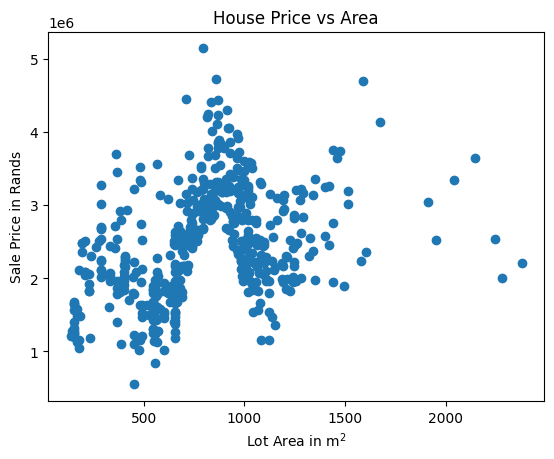

In [ ]:
X = df["LotArea"] # Independent variable
y = df["SalePrice"] # Dependent variable

plt.scatter(X,y) # Create scatter plot
plt.title("House Price vs Area")
plt.xlabel("Lot Area in m$^2$")
plt.ylabel("Sale Price in Rands")
plt.show()

### Pre-processing

In [ ]:
x_scaler = StandardScaler()
y_scaler = StandardScaler()

# Normalise X and y
X_scaled = x_scaler.fit_transform(np.array(X)[:,np.newaxis])
y_scaled = y_scaler.fit_transform(np.array(y)[:,np.newaxis])

# Set test size to 20 % of training data
x_train, x_test, y_train, y_test = train_test_split(X_scaled,y_scaled,test_size=0.2,random_state=6)

In [ ]:
# Instantiate linear regression model
lin_reg = LinearRegression()

lin_reg.fit(x_train,y_train)

LinearRegression()

RMSE:  0.9597285404528204


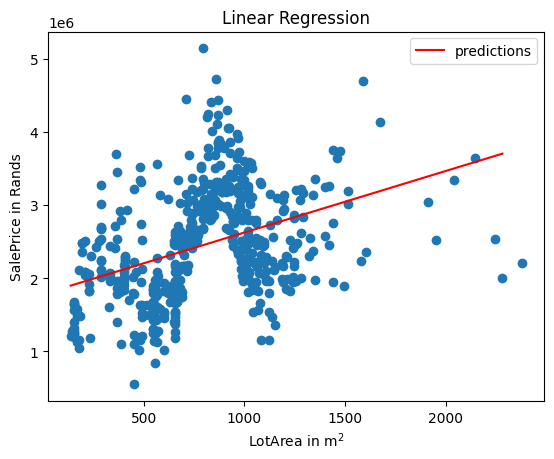

In [ ]:
y_pred = lin_reg.predict(x_test)
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred)))

# Plot the linear regression prediction line over data
x_domain = np.linspace(min(x_train),max(x_train),100)

y_pred_rescaled = y_scaler.inverse_transform(lin_reg.predict(x_domain))
x_rescaled = x_scaler.inverse_transform(x_domain)

plt.figure()
plt.scatter(X, y)
plt.plot(x_rescaled, y_pred_rescaled, color="red", label='predictions')
plt.xlabel("LotArea in m$^2$")
plt.ylabel("SalePrice in Rands")
plt.title("Linear Regression")
plt.legend()
plt.show()

In [ ]:
# Instantiate regression tree model
regr_tree = DecisionTreeRegressor(max_depth=3)

regr_tree.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3)

RMSE:  0.8155834161717601


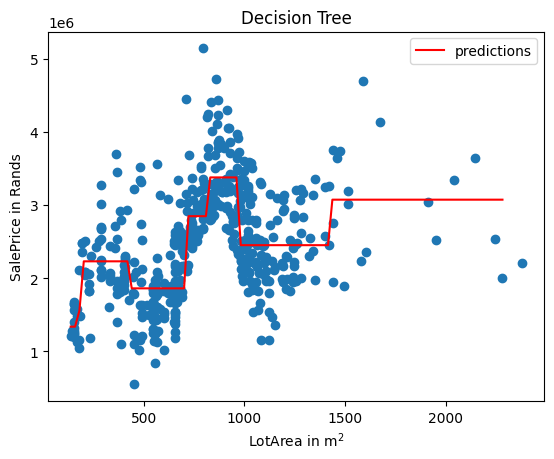

In [ ]:
## Lets check performance using the root mean square error (RMSE) metric:

y_pred = regr_tree.predict(x_test)
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred)))

# Plot the regression tree prediction line over data
x_domain = np.linspace(min(x_train),max(x_train),100)

y_pred_rescaled = y_scaler.inverse_transform(regr_tree.predict(x_domain).reshape(-1, 1))
x_rescaled = x_scaler.inverse_transform(x_domain)

plt.figure()
plt.scatter(X, y)
plt.plot(x_rescaled, y_pred_rescaled, color="red", label='predictions')
plt.xlabel("LotArea in m$^2$")
plt.ylabel("SalePrice in Rands")
plt.title("Decision Tree")
plt.legend()
plt.show()

### Support vector regression

In [ ]:
# Instantiate support vector regression model
sv_reg = SVR(kernel='rbf', gamma='auto')

sv_reg.fit(x_train,y_train[:,0])

SVR(gamma='auto')

RMSE:  0.7823020808791089


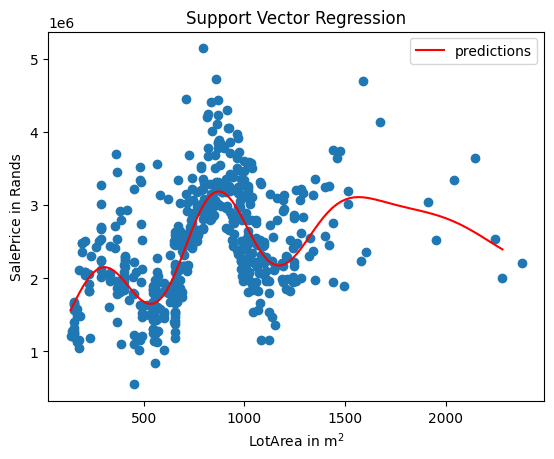

In [ ]:
y_pred = sv_reg.predict(x_test)
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred)))

# Plot the SVR prediction line over data
x_domain = np.linspace(min(x_train),max(x_train),100)

y_pred_rescaled = y_scaler.inverse_transform(sv_reg.predict(x_domain).reshape(-1, 1))
x_rescaled = x_scaler.inverse_transform(x_domain)

plt.figure()
plt.scatter(X, y)
plt.plot(x_rescaled, y_pred_rescaled, color="red", label='predictions')
plt.xlabel("LotArea in m$^2$")
plt.ylabel("SalePrice in Rands")
plt.title("Support Vector Regression")
plt.legend()
plt.show()

### Homogeneous ensembles

#### Bagging (AKA bootstrap aggregating)

In [ ]:
from sklearn.ensemble import BaggingRegressor

In [ ]:
# Instantiate decision tree regression model to use as the base model
d_tree = DecisionTreeRegressor(max_depth=4)

# Instantiate BaggingRegressor model with a decision tree as the base model
bag_reg = BaggingRegressor(estimator = d_tree)

In [ ]:
bag_reg.fit(x_train,y_train[:,0])

BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=4))

RMSE:  0.7736148193199958


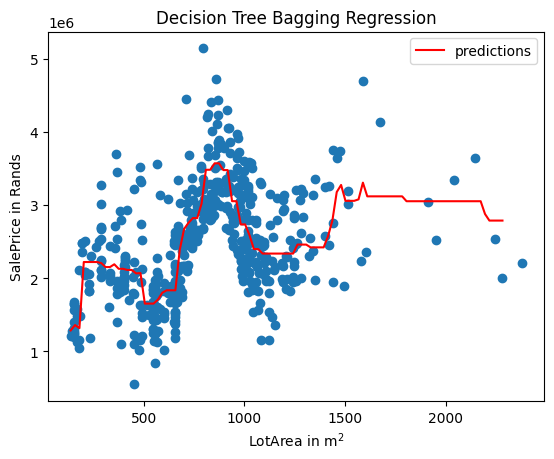

In [ ]:
# Checking the performance of the bagging ensemble:

y_pred = bag_reg.predict(x_test)
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred)))

# plot the bagging regression prediction line over data
x_domain = np.linspace(min(x_train),max(x_train),100)

y_pred_rescaled = y_scaler.inverse_transform(bag_reg.predict(x_domain).reshape(-1, 1))
x_rescaled = x_scaler.inverse_transform(x_domain)

plt.figure()
plt.scatter(X, y)
plt.plot(x_rescaled, y_pred_rescaled, color="red", label='predictions')
plt.xlabel("LotArea in m$^2$")
plt.ylabel("SalePrice in Rands")
plt.title("Decision Tree Bagging Regression")
plt.legend()
plt.show()



When we try and run the above code cells a couple of times, we observe that the RMSE error metric changes. This occurs due to the random sampling process that is used to build our ensemble.

As such, it's often good practice to manually set or record the random_state variable used to derive a specific result. This allows your work to be reproducible and easy to share with others.


### Boosting

Boosting ensembles are built by combining multiple 'weak models' (for example, a decision tree with a depth of 1) in a sequential fashion.
The final predictions are then made by aggregating the individual predictions of all the models in the ensemble.

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
# Instantiate decision tree regression model to use as the base model
d_tree = DecisionTreeRegressor(max_depth=3)

# Instantiate AdaBoostRegressor model with a decision tree as the base model
bst_reg = AdaBoostRegressor(estimator = d_tree)

In [ ]:
bst_reg.fit(x_train,y_train[:,0])

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=3))

RMSE:  0.7864021389929855


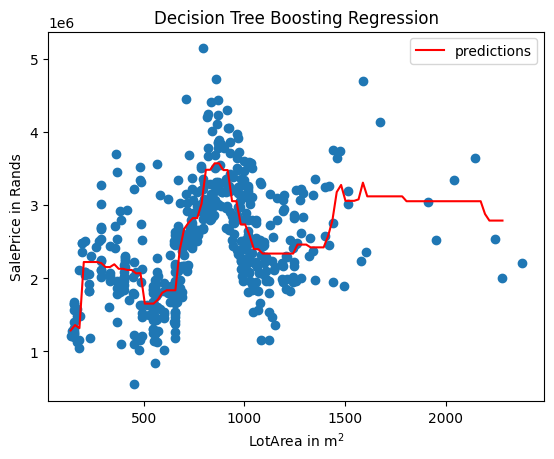

In [ ]:
y_pred = bst_reg.predict(x_test)
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred)))

# plot the boosting regression prediction line over data
x_domain = np.linspace(min(x_train),max(x_train),100)

y_pred_rescaled = y_scaler.inverse_transform(bag_reg.predict(x_domain).reshape(-1, 1))
x_rescaled = x_scaler.inverse_transform(x_domain)

plt.figure()
plt.scatter(X, y)
plt.plot(x_rescaled, y_pred_rescaled, color="red", label='predictions')
plt.xlabel("LotArea in m$^2$")
plt.ylabel("SalePrice in Rands")
plt.title("Decision Tree Boosting Regression")
plt.legend()
plt.show()